# **Predictive Modeling**

This Jupyter Notebook offers a comprehensive analysis that combines predictive analytics and clustering techniques applied to datasets. We start with basic data loading, handling, cleaning, and exploratory data analysis (EDA) using visualizations.

Throughout this project, we effectively demonstrate data manipulation, visualization, and machine learning implementation, finally culminating in a robust analysis that aims to extract meaningful insights from the data.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

***

## **1. Titanic Dataset**

- Data: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
- Explore the data
- Create and test a model to predict if someone likely survived or not
- Provide relevant visualizations to help explain the model

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
raw_data = pd.read_csv(url)

# Look At Data
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check For Missing Values
print("COUNT OF MISSING VALUES:")
print(raw_data.isnull().sum())

print("\nSUMMARY STATISTICS:")
raw_data.describe()

COUNT OF MISSING VALUES:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

SUMMARY STATISTICS:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Clean Data By Dropping Irrelevant Features
clean_data = raw_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Fill In Missing Values For Columns As Necessary
clean_data['Age'] = clean_data['Age'].fillna(clean_data['Age'].median())
clean_data['Embarked'] = clean_data['Embarked'].fillna(clean_data['Embarked'].mode()[0])

# Check Data After Cleaning
print("COUNT OF MISSING VALUES:")
print(clean_data.isnull().sum())

COUNT OF MISSING VALUES:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


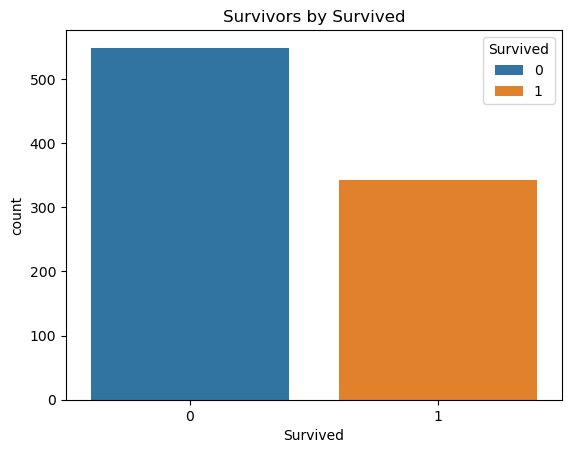

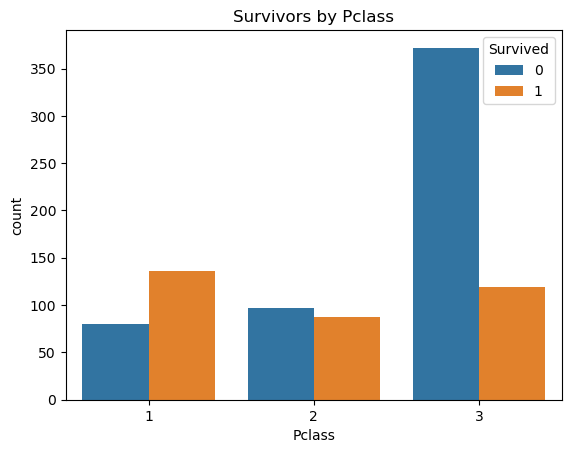

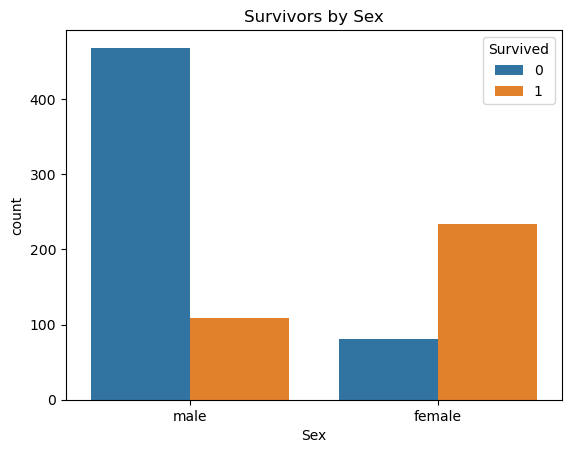

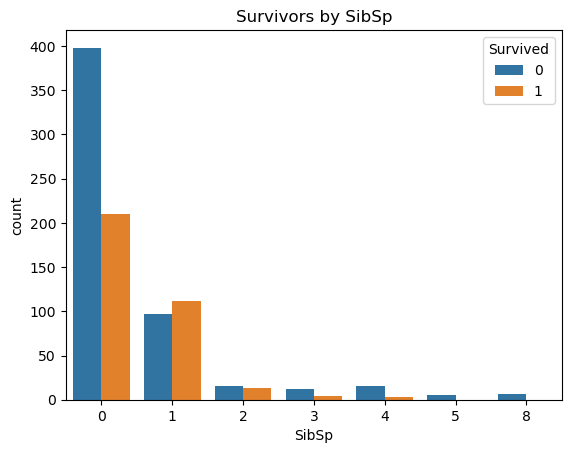

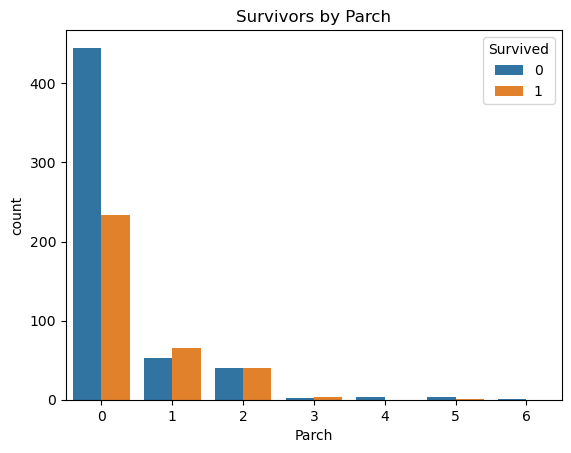

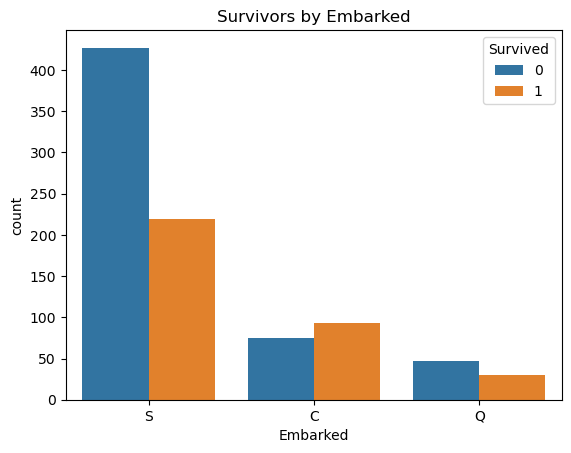

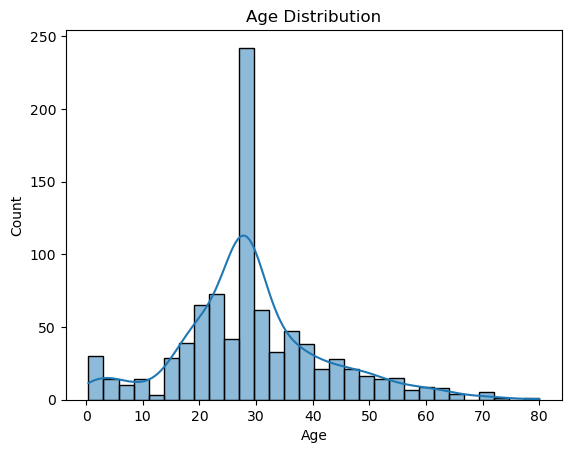

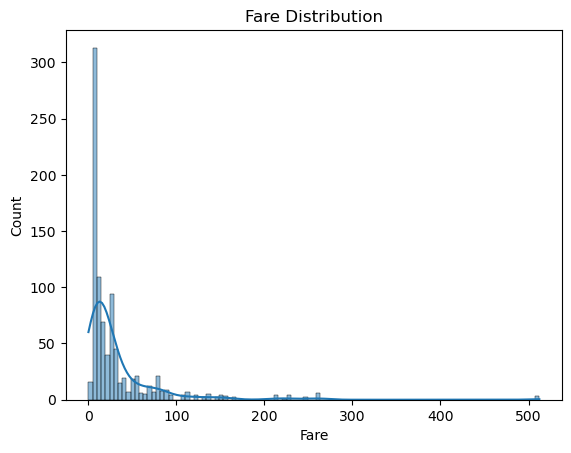

In [5]:
# Count Plots For Exploratory Data Analysis (EDA)
categorical_features = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for column in categorical_features:
    sns.countplot(x=column, hue="Survived", data=clean_data)
    plt.title(f"Survivors by {column}")
    plt.show()
    print("\n")

# Histogram Plots For Exploratory Data Analysis (EDA)
numerical_features = ["Age", "Fare"]
for column in numerical_features:
    sns.histplot(x=clean_data[column], kde=True)
    plt.title(f"{column} Distribution")
    plt.show()
    print("\n")

In [6]:
# One-Hot Encoding
data = pd.get_dummies(clean_data, drop_first=True)

# Define X and y
X = data.drop('Survived', axis=1)
y = data['Survived']

# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split Dataset For Training And Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

# Logistic Regression Model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Predictions
predictions = model1.predict(X_test)

# Model Evaluation
print("ACCURACY SCORE:", accuracy_score(y_test, predictions))
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, predictions))

ACCURACY SCORE: 0.8059701492537313

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       156
           1       0.76      0.78      0.77       112

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



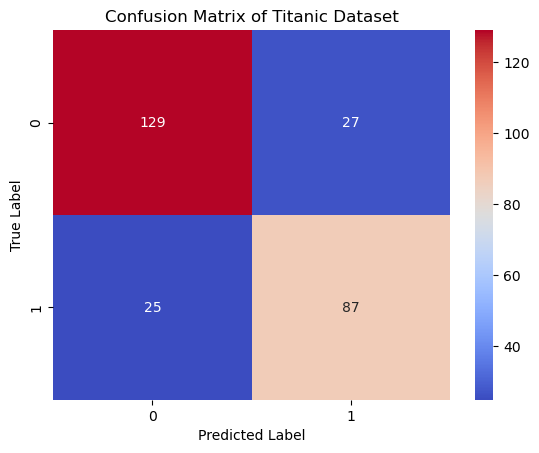

In [7]:
# Confusion Matrix Heatmap Visualization
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Titanic Dataset')
plt.show()

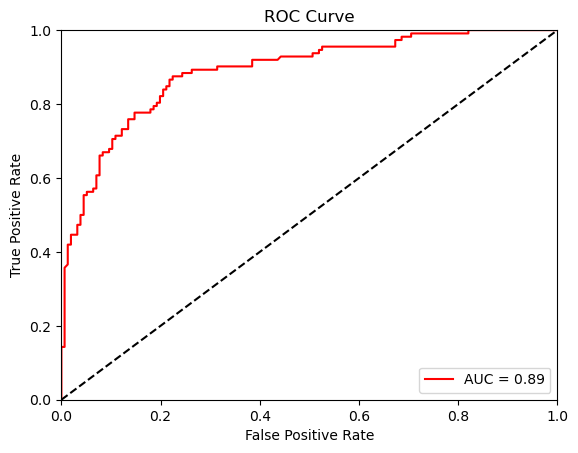

In [8]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
# ANALYSIS
# We started by defining our objective, we were asked to analyze the Titanic Dataset and build a model to predict whether or not
# someone likely survivet the sinking of the Titanc. To do this, we decided to use a Logistic Regression Model. Next, we did a little
# bit of data cleaning by checking for missing values and filling them in. We also got rid of irrelevant features that we believed
# would be of no use to us. Next, we completed Exploratory Data Analysis for our data by exploring the count plots of our categorical
# data, and the histogram plots of our numerical data. Once we were done exploring our data and seeing the relationships, we did One-Hot
# Encoding in order to convert our categorical data into numerical format. This makes the data easier for us to use in our model. We then
# went through the steps of Data Modeling where we split the data, normalized it, and then fed it into our Logistic Regression Model.
# By doing this, we were able to make our predictions on whether or not someone likely survived the sinking of the Titanic. These predictions
# were then used to compute a Confusion Matrix, evaluating our model's performance. Using a Heat Map helped us visualize this performance,
# making it easier for us to interpret. Finally, the ROC Curve tells us how much our model's performance varies under different conditions.

***

## **2. California Housing**

- Load the California housing data using
    - `from sklearn.datasets import fetch_california_housing`
- Explore the data
- Create and test a model to predict medium housing values
- Provide relevant visualizations to help explain the model

In [10]:
# Import Necessary Libraries
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [11]:
# Load Dataset
from sklearn.datasets import fetch_california_housing
# Ref: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
housing = fetch_california_housing(as_frame=True)

# Take A Look At Data
print("DATASET FEATURES:")
print(housing.feature_names)
print("\nSAMPLE OF DATA VALUES:")
print(housing.data.sample(5))
print("\nSAMPLE OF TARGET VALUES:")
print(housing.target.sample(10))

DATASET FEATURES:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

SAMPLE OF DATA VALUES:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3749   3.0061      40.0  3.952471   1.079848      1396.0  2.653992     34.18   
3253   2.2167      18.0  3.782468   1.084416      1119.0  3.633117     36.01   
16765  4.5000      36.0  5.071698   0.973585       782.0  2.950943     37.69   
19105  5.1391       9.0  6.309934   1.080795      2077.0  2.750993     38.27   
5204   3.3836      43.0  5.741477   1.076705      1051.0  2.985795     33.93   

       Longitude  
3749     -118.38  
3253     -120.12  
16765    -122.49  
19105    -122.65  
5204     -118.29  

SAMPLE OF TARGET VALUES:
12448    0.949
18241    3.277
17473    2.614
9311     3.375
13449    1.054
9703     1.125
14107    0.906
2574     0.869
20286    1.821
18598    2.023
Name: MedHouseVal, dtype: float64


In [12]:
# Check For Missing Values
print("COUNT OF MISSING VALUES:")
print(housing.data.isnull().sum())

print("\nSUMMARY STATISTICS:")
housing.data.describe()

COUNT OF MISSING VALUES:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

SUMMARY STATISTICS:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


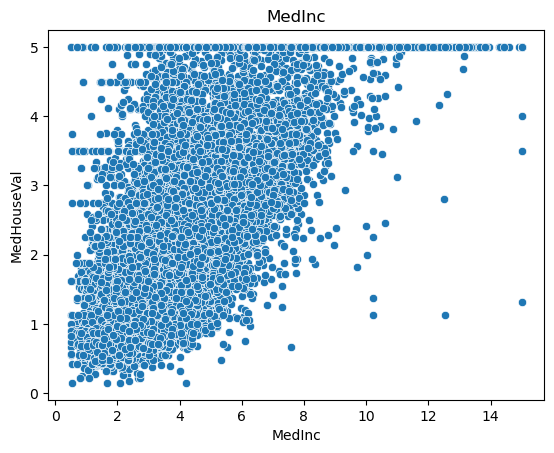

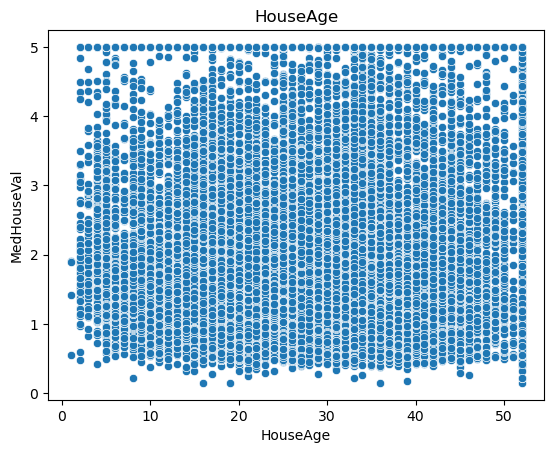

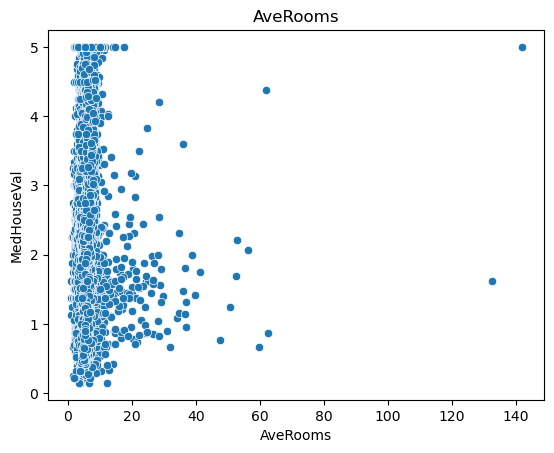

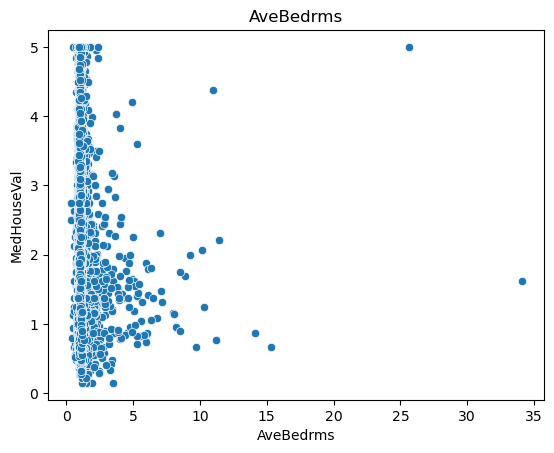

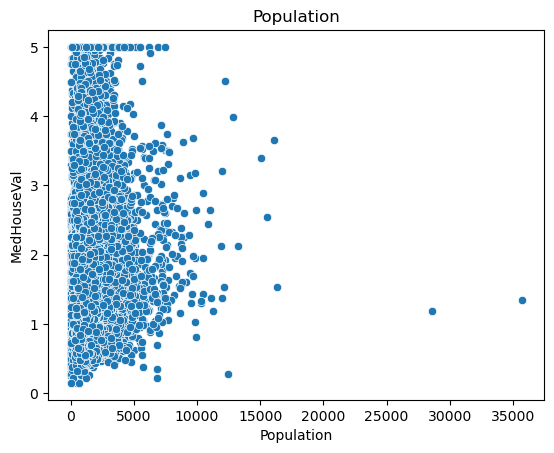

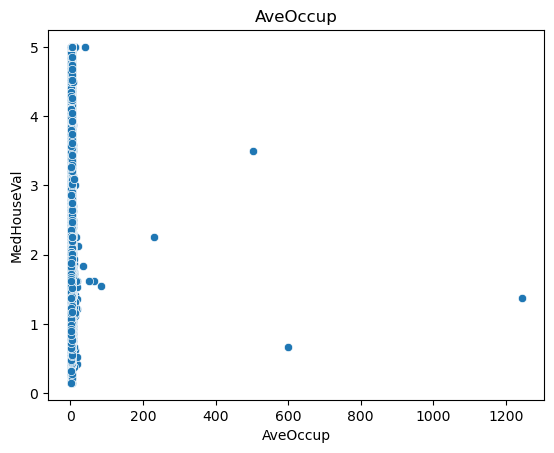

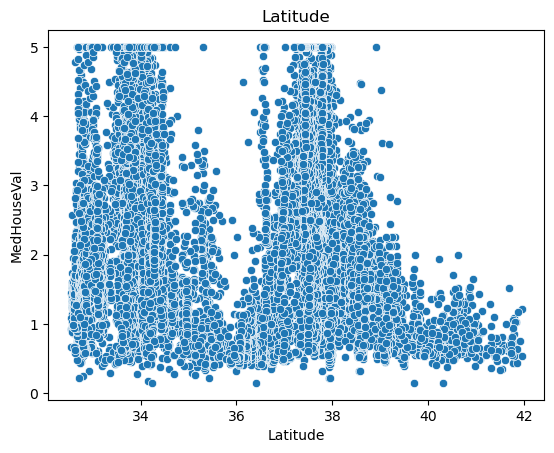

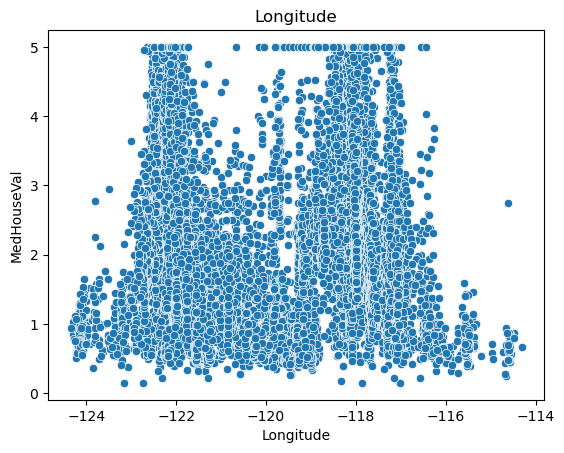

In [13]:
# Scatter Plots For Exploratory Data Analysis (EDA)
for column in housing.data.columns:
    sns.scatterplot(x=housing.data[column], y=housing.target)
    plt.title(column)
    plt.show()
    print("\n")

In [14]:
# Define X and y
X = housing.data
y = housing.target

# Remove Outliers
z = (np.abs(stats.zscore(X)) < 2).all(axis=1)
X_no_outliers, y_no_outliers = X[z], y[z]

# Split Dataset For Training And Testing
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=4)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Model Evaluation
R2 = model.score(X_test_scaled, y_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(f"R² Score: {R2}")
print(f"Root Mean Squared Error: {RMSE}")

R² Score: 0.6130872993470773
Root Mean Squared Error: 0.6535074858607129


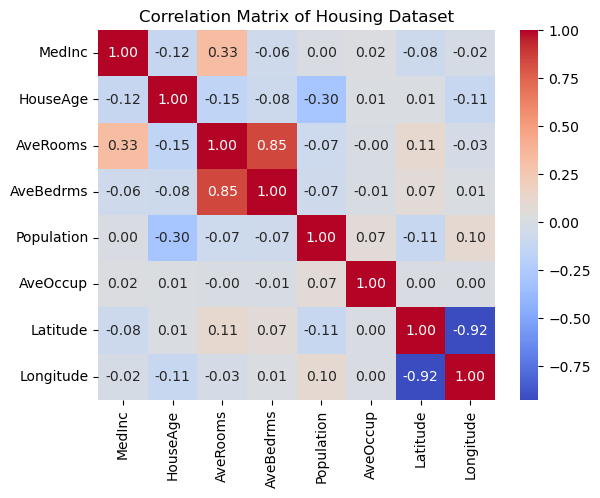

In [15]:
# Correlation Matrix Heatmap Visualization
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Housing Dataset')
plt.show()

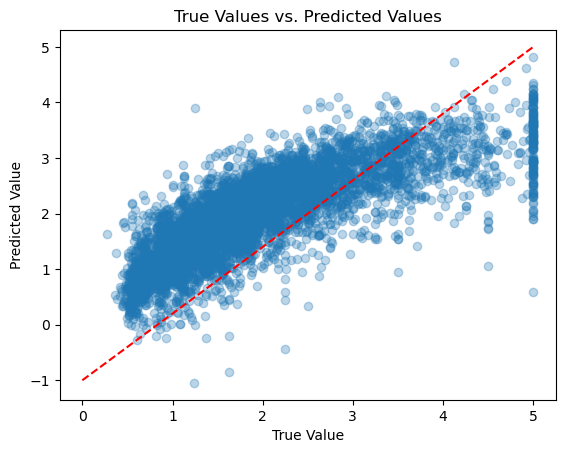

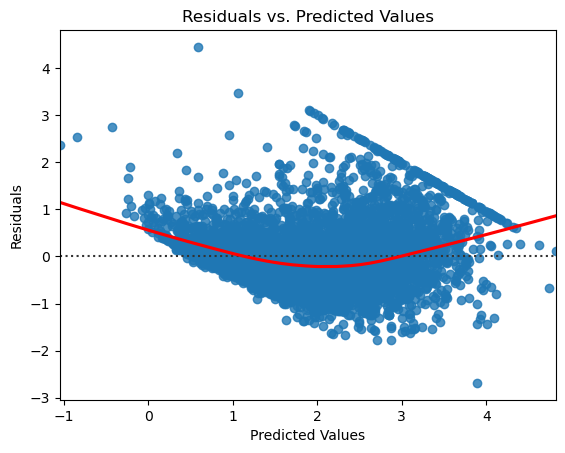

In [16]:
# Scatter Plot
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([0, 5], [-1, 5], linestyle='--', color='red')
plt.title('True Values vs. Predicted Values')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

# Residual Plot
print('\n')
sns.residplot(x=predictions, y=y_test, lowess=True, line_kws=dict(color='red'))
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [17]:
# ANALYSIS
# We started by defining our objective, we were asked to analyze the Housing Dataset and build a model to predict medium housing
# values. To do this, we decided to use a Linear Regression Model. Next, we did a little bit of data cleaning by checking for missing
# values and filling them in, which was not necessary for this model as there was no missing data. There were no irrelevant features
# to drop either, so we moved on to complete Exploratory Data Analysis for our data by exploring the scatter plots of the numerical data.
# Once we were done exploring our data and seeing the relationships, we decided to remove some outliers that might heavily skew our data,
# and cause overfitting or underfitting. After splitting the data into training and test sets, we normalized it and fed it into our Linear
# Regression Model. By doing this, we were able to make our predictions on medium housing values. In addition, we also created a correlation
# map that helps us idenitfy any important relationships that we might have missed previously. This is good if we want to go back and improve
# our model somehow. Finally, we created two plots to help visualize our model's performance. The first plot is a scatter plot showing the
# actual Linear Regression line that tells information about our model's predictions. The second plot is a Residual plot that tells us how good
# our Linear Regression line is at predicting medium housing values, effectively measuring the performance of our line.

***

## **3. Wine Quality**

- Use an unsupervised method to group wines together
- Explore the data
- Use a technique to determine how many groups there are in the data
- Overlay the actual results onto the groups and create a comparison
- Provide relevant visualizations to help explain the model

In [18]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
wine = datasets.load_wine()
data = wine.data
target = wine.target
feature_names = wine.feature_names

In [19]:
# Load Dataset
dfWine = pd.DataFrame(data, columns=feature_names)

# Look At Data
dfWine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
# Check For Missing Values
print("COUNT OF MISSING VALUES:")
print(dfWine.isnull().sum())

print("\nSUMMARY STATISTICS:")
dfWine.describe()

COUNT OF MISSING VALUES:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

SUMMARY STATISTICS:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [21]:
# Scale Data
sc = StandardScaler()
dfWine_scaled = pd.DataFrame(sc.fit_transform(dfWine), columns=dfWine.columns)

# Look At Scaled Data
dfWine_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


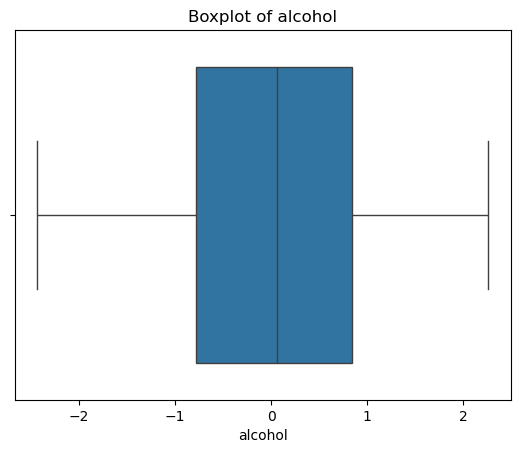

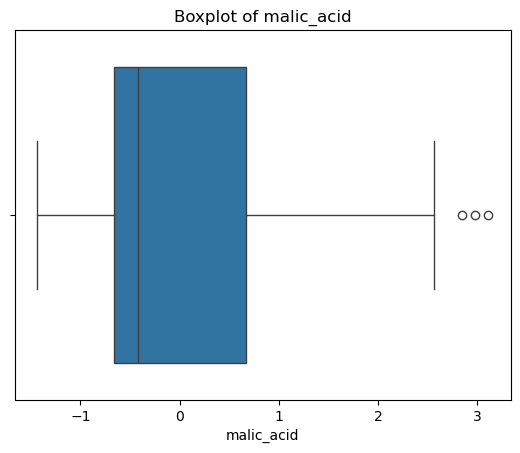

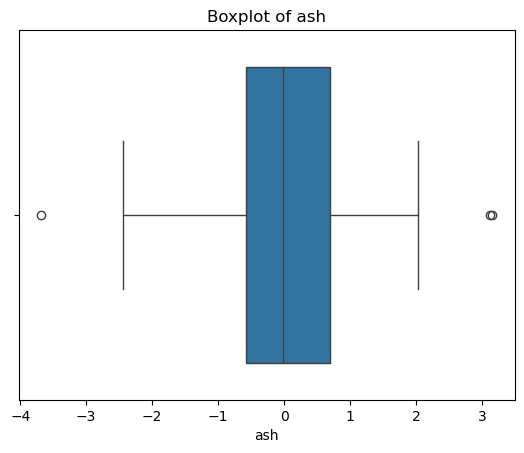

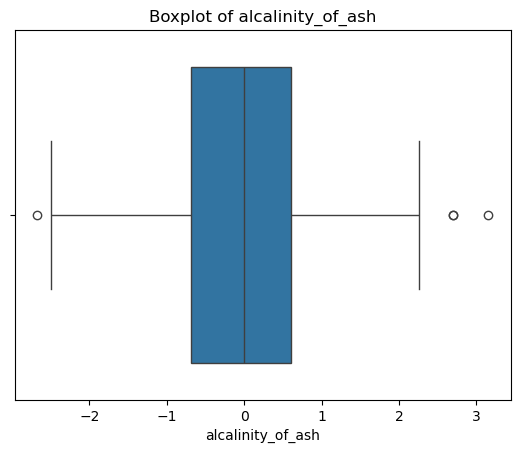

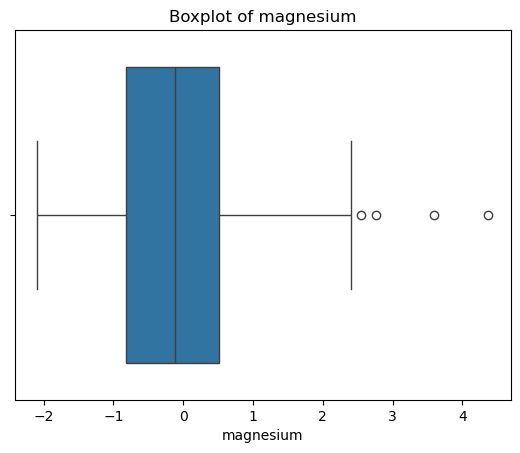

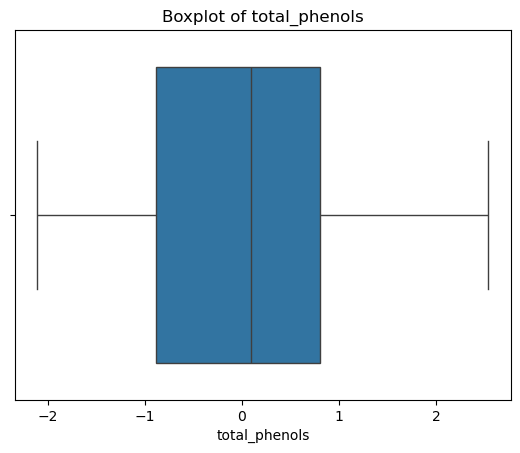

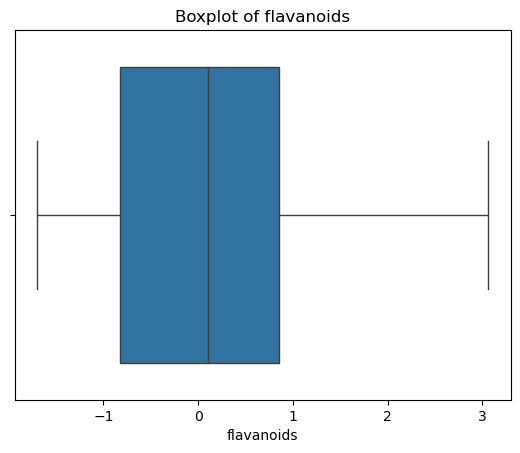

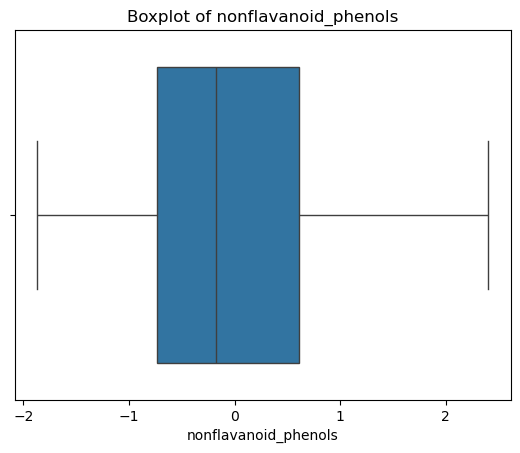

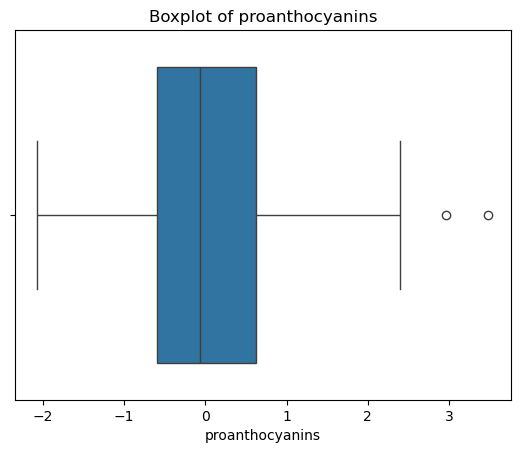

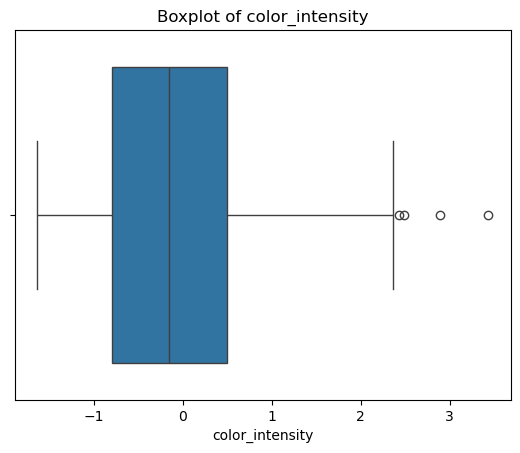

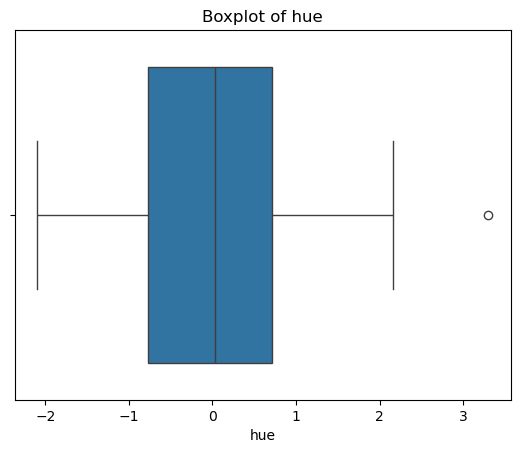

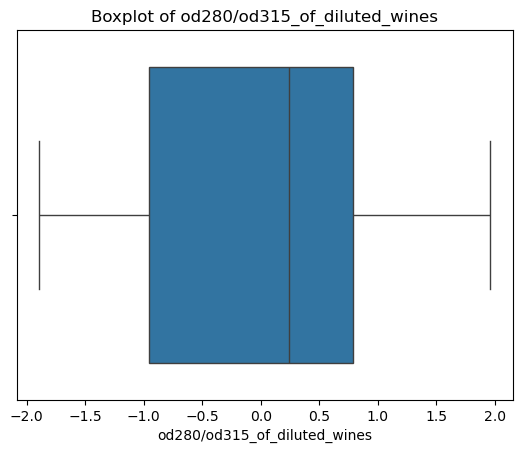

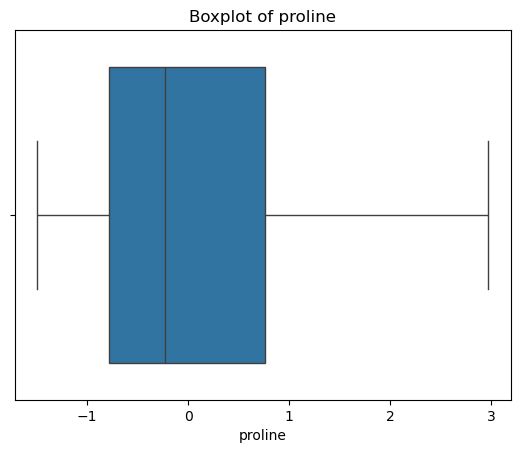

In [22]:
# Box Plots To Check Outliers
for column in dfWine_scaled:
    sns.boxplot(x=dfWine_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    print("\n")

In [23]:
# Remove outliers
dfWine_no_outliers = dfWine_scaled[(np.abs(stats.zscore(dfWine_scaled)) < 2).all(axis=1)]

# Resize Dataframe
dfWine = dfWine.loc[dfWine_no_outliers.index]

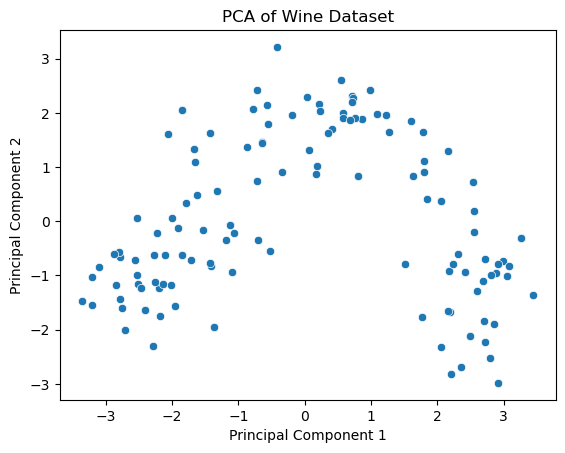

In [24]:
# Reducing dimensions for visualization
pca = PCA(n_components=2)
dfWine_pca = pd.DataFrame(data=pca.fit_transform(dfWine_no_outliers), columns=['PCA1', 'PCA2'])

# Scatter plot of PCA results
sns.scatterplot(x='PCA1', y='PCA2', data=dfWine_pca)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

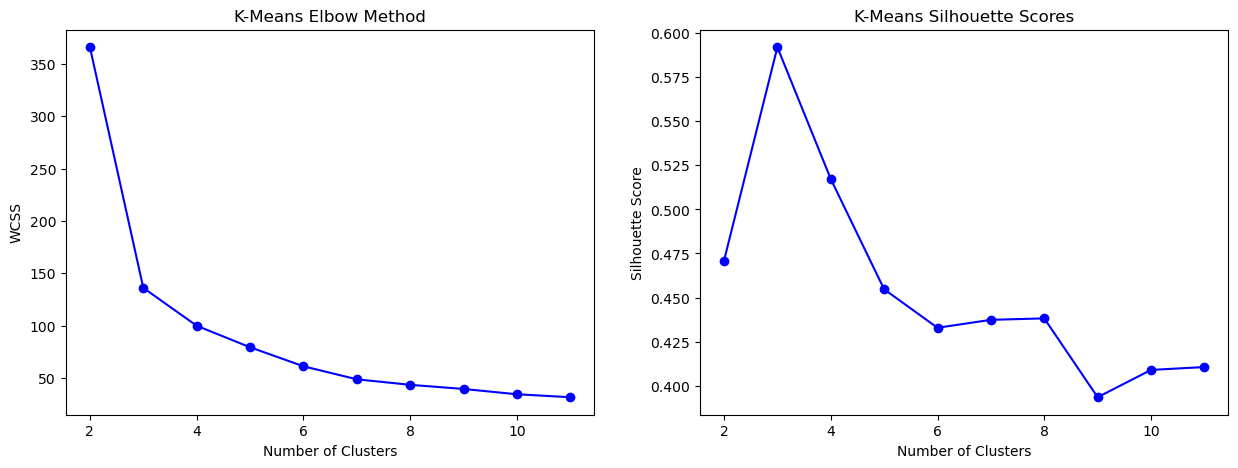

In [25]:
# Elbow Method For Optimal Number Of Clusters
WCSS = []
silhouettes = []

# Clustering
for i in range(2, 12):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=100)
    km.fit(dfWine_pca)
    WCSS.append(km.inertia_)
    silhouettes.append(silhouette_score(dfWine_pca, km.labels_, metric = 'euclidean'))

# Plot Elbow Method
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 12), WCSS, 'bo-')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 12), silhouettes, 'bo-')
plt.title('K-Means Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

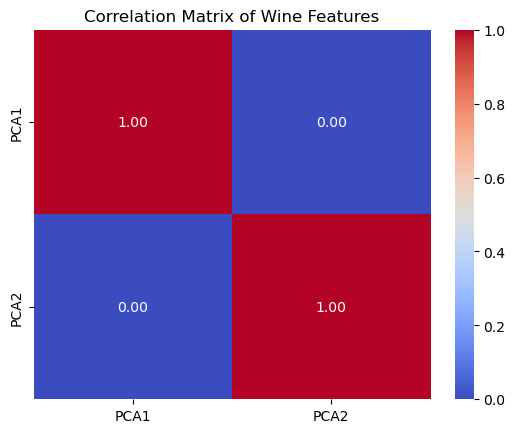

In [26]:
# Correlation matrix
corr_matrix = dfWine_pca.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Wine Features")
plt.show()

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=100)
clusters = kmeans.fit_predict(dfWine_pca)

# Silhouette Score
print("SILHOUETTE SCORE: ", silhouette_score(dfWine_pca, clusters))

SILHOUETTE SCORE:  0.5920127143449306


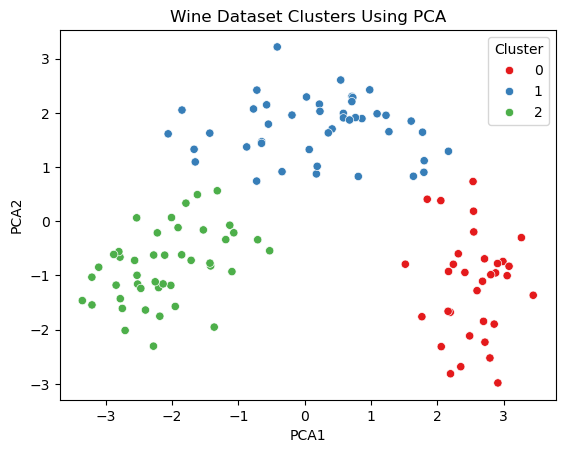

In [28]:
# Plot Cluster Sizes
dfWine_pca['Cluster'] = clusters

# Scatter plot of the PCA-reduced data
sns.scatterplot(data=dfWine_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Wine Dataset Clusters Using PCA')
plt.show()

In [29]:
# ANALYSIS
# We started by defining our objective, we were asked to analyze the Wine Quality dataset and build a model to determine the number
# of groups there are. In other words, we are trying to find the optimal number of clusters in the dataset. To do this, we decided
# to use a K-Means Clustering. Next, we did a little bit of data cleaning by checking for missing values and filling them in, which
# was not necessary for this model as there was no missing data. We then went ahead and normalized the data in order to make it easier
# for us to work with, since it is harder to cluster data that is scaled differently. Afterwards, we completed Exploratory Data Analysis
# by exploring the boxplots of our data and checking for outliers. These boxplots helped us visualize oufliers easier and helped us decided
# how we shuld remove them. Once we removed the outliers, we resized the dataframe index in order to compensate for the removal of rows.
# This was followed by completing Principal Component Analysis, which reduced the dimensions of our data down to just two, allowing us to
# simplify the dataset and and focus on the most informative features. PCA can improve K-Means clustering, and it did for us. When we first
# made this model, we got a really bad score of 0.25, but after we went back and added PCA our score became 0.60. We then get a visual feel
# for this data, with reduced-dimensionality, through a scatter plot. We finally use K-Means Clustering to find the optimal number of clusters,
# followed by computation of a silhouette score. This silhouette score is a good way for us to check if our clusters make sense. Lastly, we
# plotted the newly clustered data through a scatter plot, allowing us to visualize the different clusters using different colors.